<a href="https://colab.research.google.com/github/chingyunghuang/titanic-analysis/blob/main/%E5%B0%88%E6%A1%88%E5%AF%A6%E4%BD%9C%EF%BC%8301_%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded=files.upload()
import io
train_data = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test_data = pd.read_csv(io.BytesIO(uploaded['test.csv']))

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
################ First Version Model #######################

In [3]:
# preprocessing data

# one hot encoding for Pclass and Sex 
train_data1 = pd.concat([train_data, pd.get_dummies(train_data["Pclass"],prefix='Class')], axis=1)
train_data1 = pd.concat([train_data1, pd.get_dummies(train_data1["Sex"])], axis=1)

# fill na
train_data1[["Embarked"]] = train_data1[["Embarked"]].fillna('S')
train_data1[["Age"]] = train_data1[["Age"]].fillna(train_data1[["Age"]].mean())

# one hot encoding for Embarked
train_data1 = pd.concat([train_data1, pd.get_dummies(train_data1["Embarked"],prefix='Embarked')], axis=1)

train_data1.head()
train_data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Class_1      891 non-null    uint8  
 13  Class_2      891 non-null    uint8  
 14  Class_3      891 non-null    uint8  
 15  female       891 non-null    uint8  
 16  male         891 non-null    uint8  
 17  Embarked_C   891 non-null    uint8  
 18  Embarked_Q   891 non-null    uint8  
 19  Embarked

Fare          0.257307
Embarked_S   -0.149683
Embarked_C    0.168240
Class_2       0.093349
Class_1       0.285904
Age          -0.069809
Parch         0.081629
Embarked_Q    0.003650
SibSp        -0.035322
male         -0.543351
Class_3      -0.322308
female        0.543351
Survived      1.000000
Name: Survived, dtype: float64

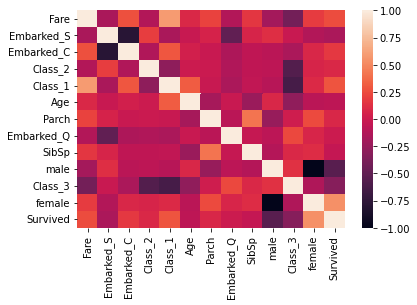

In [4]:
columns_X1 = list(set(train_data1.columns) - {'Pclass','PassengerId','Sex','Name','Ticket','Cabin','Embarked'})

# plot the heatmap
corr=train_data1[columns_X1].corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
#進一步觀察其他「數值欄位/類別欄位」的屬性與「是否生存欄位」之關係程度，找出關係大的欄位。
train_data1[columns_X1].corr()['Survived']


In [5]:
columns_X = list(set(train_data1.columns) - {'Survived','Pclass','PassengerId','Sex','Name','Ticket','Cabin','Embarked'})
columns_y = ['Survived']

train_X = train_data1[columns_X]
train_y = train_data1[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
scores

array([0.77653631, 0.79213483, 0.78651685, 0.76966292, 0.83707865])

In [ ]:
########## Second Version Model ###############

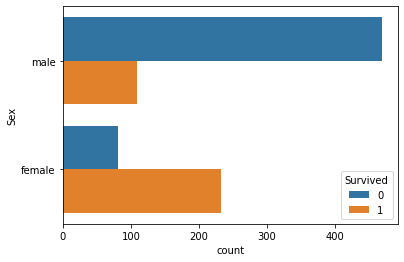

In [22]:
train_data1['Sex']
sns.countplot(y=train_data1['Sex'],hue=train_data1.Survived)

<Figure size 432x288 with 0 Axes>

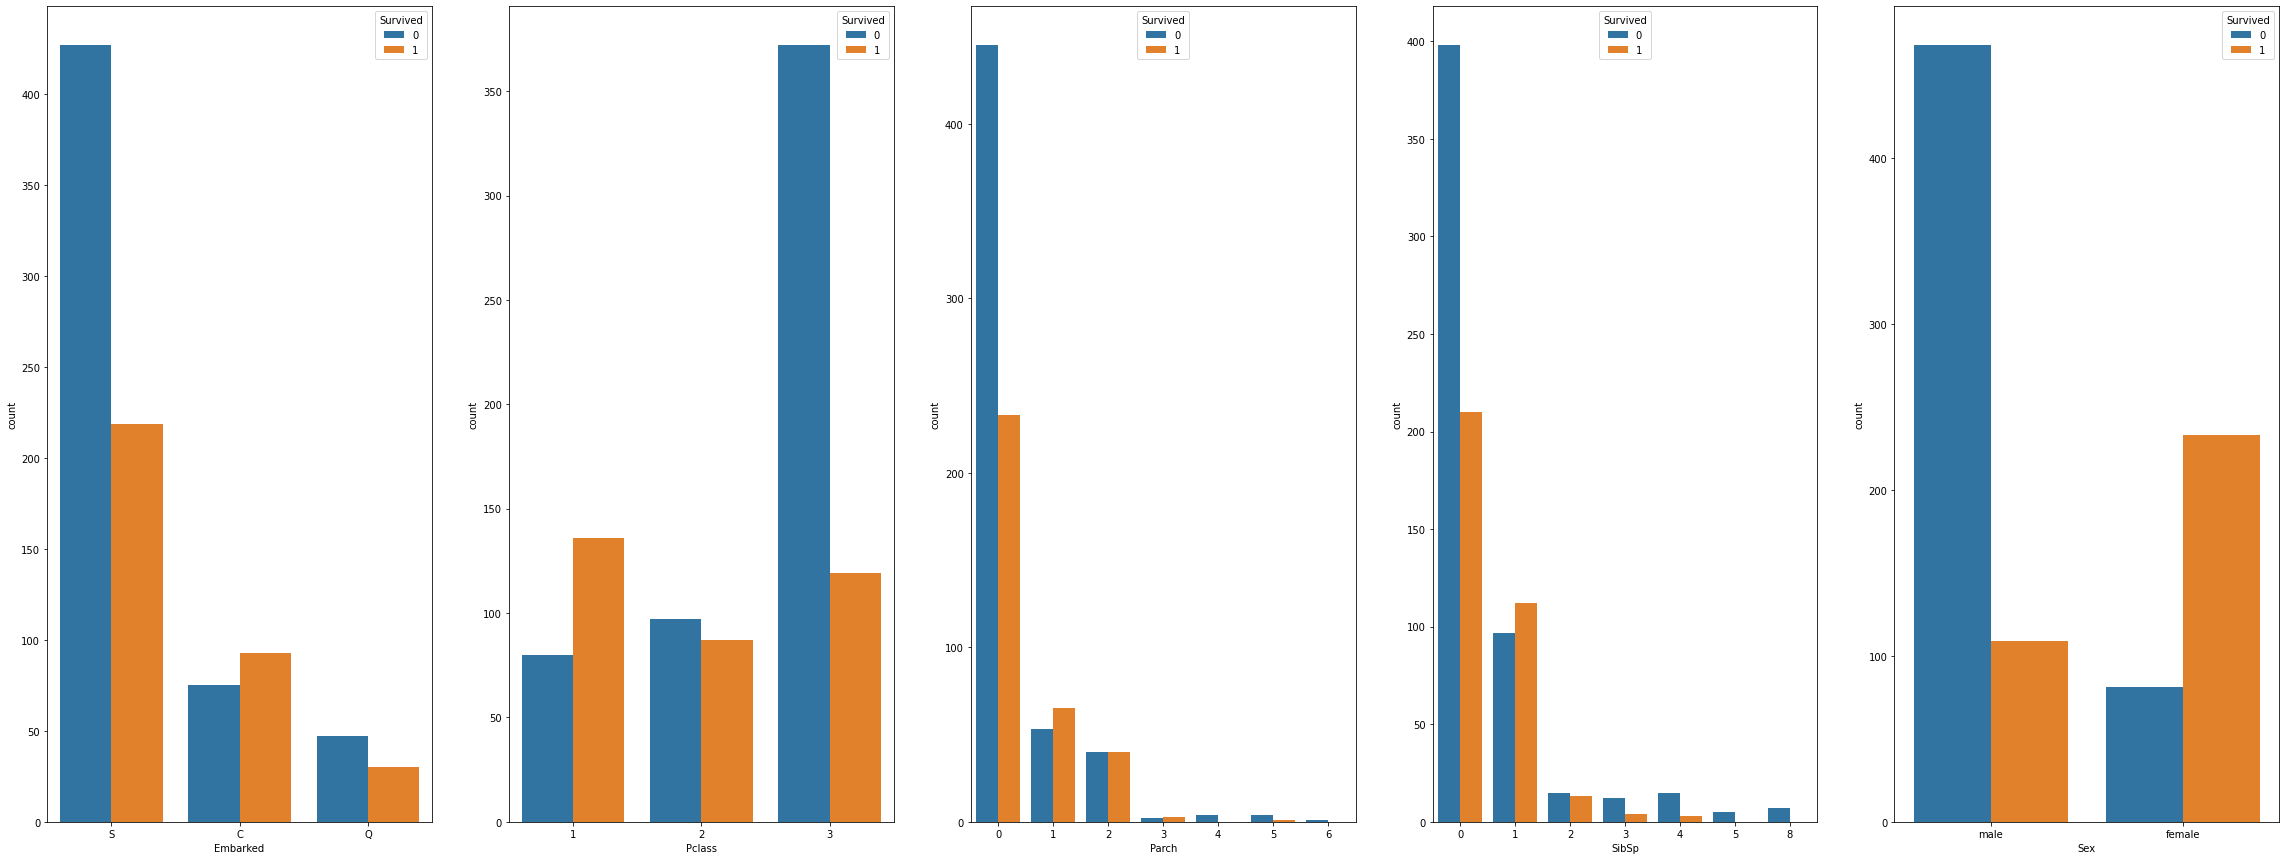

In [52]:
# optimize the model

# 延續昨天的觀察，欄位中與「是否生存欄位」找出關係比較大的欄位有哪些？你是如何定義「關係大」的呢？
# 看到 是female與有存活有比較高的正相關 ，因此female這個feature 與「是否生存欄位」關係較大

  # Method: Correlation
columns_X1 = list(set(train_data1.columns) - {'Pclass','PassengerId','Sex','Name','Ticket','Cabin','Embarked'})
train_data1[columns_X1].corr()['Survived']


  # Method : Visualization 
column_list=['Sex','Embarked','Pclass','Parch','SibSp']

plt.figure() 
fig, axs = plt.subplots(1,5,figsize=(40,15))
for i, col in enumerate( train_data1[column_list] ) :
  
  sns.countplot(x=train_data1[col],hue=train_data1.Survived,ax=axs[i-1])   
  #sns.countplot(y=train_data1['Sex'],hue=train_data1.Survived,ax=axs[0])

plt.show()


# 請問資料中有哪些「欄位」你覺得是多餘的，在分析過程中應該被排除的呢？為什麼？
# Cabin 缺失值多且不重要，可以移除, Name 和 PassengerId 對於預測survived 與否沒有幫助，所以可以去除




<Figure size 720x2880 with 0 Axes>

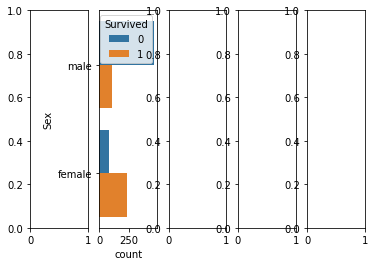

In [34]:
  # Method : Visualization 
column_list=['Sex','Embarked','Pclass','Parch','SibSp']

plt.figure(figsize=(10,40)) 
fig, axs = plt.subplots(1,5)
 
sns.countplot(y=train_data1['Sex'],hue=train_data1.Survived,ax=axs[1])
plt.show()


In [9]:
## 3. 請你針對「有缺失值」的幾個欄位，嘗試比較不同的處理策略（例如用常數、中位數、平均數填補）。


train_data2=train_data
# fill the missing value of'Embarked'with the mode value
train_data2[["Embarked"]] = train_data2[["Embarked"]].fillna('S')
# fill the missing value of'age'with median age
train_data2[["Age"]] = train_data2[["Age"]].fillna(train_data2[["Age"]].mean())



In [10]:
# 4. 請你針對「非數值型」的幾個欄位，嘗試比較不同的處理策略（例如用 LabelEncoder 或 OneHotEncoder）。

# one hot encoding for Pclass and Sex 

train_data2 = pd.concat([train_data2, pd.get_dummies(train_data2["Pclass"],prefix='Class')], axis=1)
train_data2 = pd.concat([train_data2, pd.get_dummies(train_data2["Sex"])], axis=1)